### Student Information
Name: Didier Fernando Salazar Estrada - 利 葉

Student ID: 111065427

GitHub ID: difersalest

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [260]:
#SECOND PART OF THE LAB:
########################

In [5]:
### Begin Assignment Here (STARTING THE SECOND PART OF THE HOMEWORK HERE)
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
# THE DATA:
#We start by importing our data from the text files as lists, each line corresponds to an item in the list
with open('amazon_cells_labelled.txt') as f:
    amazon = f.readlines()
with open('imdb_labelled.txt') as f:
    imdb = f.readlines()
with open('yelp_labelled.txt') as f:
    yelp = f.readlines()

In [248]:
#DATA PREPARATION:
#Now we want to split the corresponding data into the two categories, the sentence and its corresponding score 
amazon_sep=[]
imdb_sep=[]
yelp_sep=[]
amazon_sent=[]
imdb_sent=[]
yelp_sent=[]
amazon_score=[]
imdb_score=[]
yelp_score=[]
#We navigate into the lists, clear the data by eliminating the '\n' at the end and split into two columns following the format '\t'.
#In this way we will have from one side the sentence and in the other the score.
for x in range(len(amazon)):
    amazon_sep.append(amazon[x].removesuffix('\n').split('\t'))
    imdb_sep.append(imdb[x].removesuffix('\n').split('\t'))
    yelp_sep.append(yelp[x].removesuffix('\n').split('\t'))

#We separate the sentences and scores accordingly to create the categories later
sentences=[]
scores=[]
for x in range(len(amazon_sep)):
    amazon_sent.append(amazon_sep[x][0])
    amazon_score.append(amazon_sep[x][1])
    imdb_sent.append(imdb_sep[x][0])
    imdb_score.append(imdb_sep[x][1])
    yelp_sent.append(yelp_sep[x][0])
    yelp_score.append(yelp_sep[x][1])

#We integrate the sentences and scores accordingly from each site
sentences.extend(amazon_sent)
sentences.extend(imdb_sent)
sentences.extend(yelp_sent)
scores.extend(amazon_score)
scores.extend(imdb_score)
scores.extend(yelp_score)


#Because every sentence and score is separated each every 1000 item in the list we can create new categories, naming them for each site in that order too.
#Categories: amazon, imdb and yelp
category_name=[]
for x in range(3000):
    if x<1000:
        category_name.append('amazon')
    if x>=1000 and x<2000:
        category_name.append('imdb')
    if x>=2000 and x<3000:
        category_name.append('yelp')


In [251]:
#DATA TRANSFORMATION
import pandas as pd
import helpers.data_mining_helpers as dmh
#Here is the data frame, with the columns made by the sentences, scores, the category assigned and the respective name of the site where the reviews where done.
X = pd.DataFrame(sentences,columns=['Sentences'])
X['Score']=scores
X['Category_name']=category_name
X #The new data frame is created

Sentences Score Category_name
0     So there is no way for me to plug it in here i...     0        amazon
1                           Good case, Excellent value.     1        amazon
2                                Great for the jawbone.     1        amazon
3     Tied to charger for conversations lasting more...     0        amazon
4                                     The mic is great.     1        amazon
...                                                 ...   ...           ...
2995  I think food should have flavor and texture an...     0          yelp
2996                           Appetite instantly gone.     0          yelp
2997  Overall I was not impressed and would not go b...     0          yelp
2998  The whole experience was underwhelming, and I ...     0          yelp
2999  Then, as if I hadn't wasted enough of my life ...     0          yelp

[3000 rows x 3 columns]

In [146]:
#Querying the data using different functions
print(X.loc[:10, 'Sentences'])
print(X.iloc[995:1005, 0])
print(X.reindex([1,1001,2001]))

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: Sentences, dtype: object
995     The screen does get smudged easily because it ...
996     What a piece of junk.. I lose more calls on th...
997                          Item Does Not Match Picture.
998     The only thing that disappoint me is the infra...
999     You can not answer calls with the unit, never ...
1000    A very, very, very slow-moving, aimless movie ...
1001 

In [147]:
print(X[X['Category_name']=='amazon'].iloc[::10][0:5]) #First 5 amazon sentences spacing 10 items between each of them for the query

                                            Sentences Score Category_name
0   So there is no way for me to plug it in here i...     0        amazon
10                    And the sound quality is great.     1        amazon
20  I went on Motorola's website and followed all ...     0        amazon
30  This is a simple little phone to use, but the ...     0        amazon
40  It has a great camera thats 2MP, and the pics ...     1        amazon


In [148]:
#DATA MINING USING PANDAS:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1) #There are no null items in the data set

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [150]:
#SAMPLING:
X_sample = X.sample(frac=0.1) #I sampled 10% of the data for the model to be trained.
X_sample

Sentences Score Category_name
2280  I went to Bachi Burger on a friend's recommend...     1          yelp
2414  I can take a little bad service but the food s...     0          yelp
136                      Very good stuff for the price.     1        amazon
2085  I love the Pho and the spring rolls oh so yumm...     1          yelp
1335  It was a very superficial movie and it gave me...     0          imdb
...                                                 ...   ...           ...
2345                    Pretty good beer selection too.     1          yelp
383   After trying many many handsfree gadgets this ...     1        amazon
378   Clear Skype Calls, Long Battery Life, Long Range.     1        amazon
47    AFTER ARGUING WITH VERIZON REGARDING THE DROPP...     0        amazon
147                    Its reception is very very poor.     0        amazon

[300 rows x 3 columns]

In [152]:
#Import the related libraries to plot and do calculations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

amazon    1000
imdb      1000
yelp      1000
Name: Category_name, dtype: int64


<AxesSubplot: title={'center': 'Total Category Distribution'}>

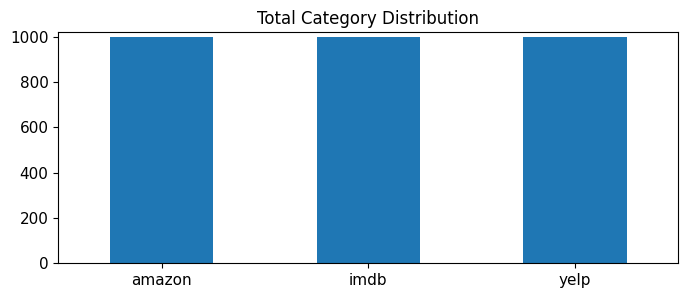

In [166]:
print(X.Category_name.value_counts()) #There are 1000 items per category (amazon, imdb and yelp) according to the general data set

# plot barchart for X
X.Category_name.value_counts().plot(kind = 'bar',
                                    title = 'Total Category Distribution',
                                    ylim = [0, max(X.Category_name.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0    1500
1    1500
Name: Score, dtype: int64


<AxesSubplot: title={'center': 'Total Score Distribution'}>

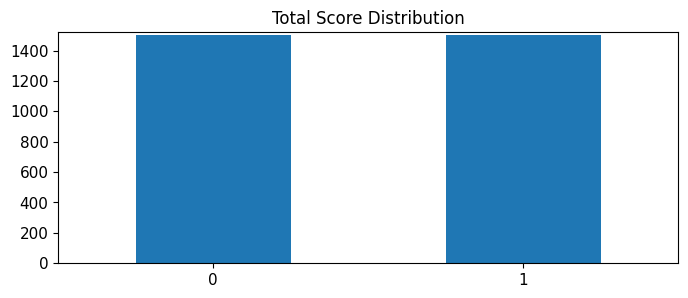

In [165]:
print(X.Score.value_counts()) #There are 500 negative and 500 positive scores (0-negative and 1-positive) according to the data set
#1500 in total making the sum for each of the category names (amazon, imdb and yelp)

# plot barchart for X
X.Score.value_counts().plot(kind = 'bar',
                                    title = 'Total Score Distribution',
                                    ylim = [0, max(X.Score.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      105
yelp      103
amazon     92
Name: Category_name, dtype: int64


<AxesSubplot: title={'center': 'Sampled Category Distribution'}>

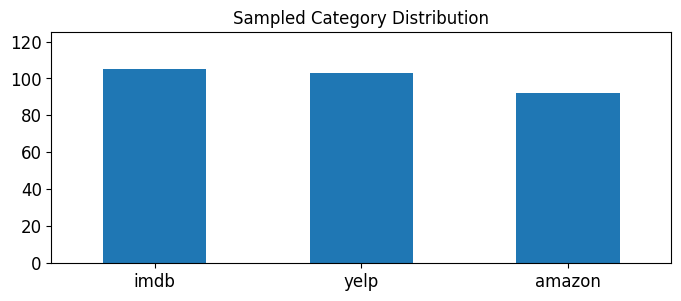

In [167]:
#We sampled 10% of the total of items, now we see how is the distribution with some graphs for the categories
# plot barchart for X_sample
print(X_sample.Category_name.value_counts())

# plot barchart for X_sample
X_sample.Category_name.value_counts().plot(kind = 'bar',
                                           title = 'Sampled Category Distribution',
                                           ylim = [0, max(X_sample.Category_name.value_counts())+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

0    159
1    141
Name: Score, dtype: int64


<AxesSubplot: title={'center': 'Sampled Score Distribution'}>

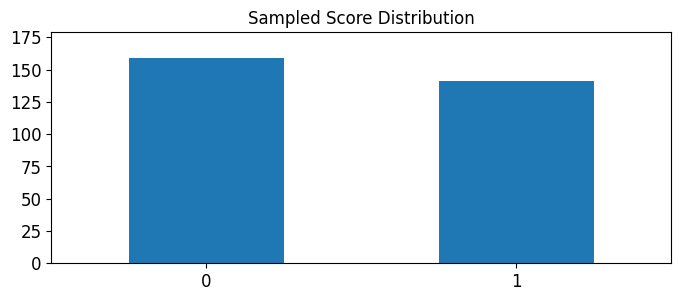

In [168]:
#We sampled 10% of the total of items, now we see how is the distribution with some graphs for the scores (0-negative and 1-positive)
# plot barchart for X_sample
print(X_sample.Score.value_counts())

# plot barchart for X_sample
X_sample.Score.value_counts().plot(kind = 'bar',
                                           title = 'Sampled Score Distribution',
                                           ylim = [0, max(X_sample.Score.value_counts())+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

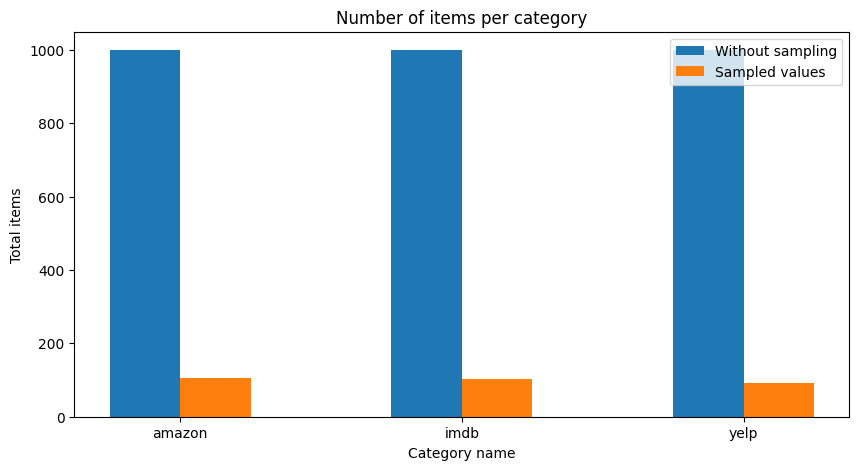

In [154]:
#There are 3 categories: amazon, imdb and yelp. Each of them in the total data set have 1000 sentences.
#Items side by side per category
# Number of bars per category
N = 3

# Position of the categories in x-axis
ind = np.arange(N)

# Graph size
plt.figure(figsize=(10,5))

# Width of the bar 
width = 0.25      

# Plotting the required graph
plt.bar(ind, X.Category_name.value_counts() , width, label='Without sampling')
plt.bar(ind + width, X_sample.Category_name.value_counts(), width, label='Sampled values')

#Labels
plt.xlabel('Category name')
plt.ylabel('Total items')
plt.title('Number of items per category')

#Bar titles
plt.xticks(ind + width / 2, (list(dict(X.Category_name.value_counts()))[0],list(dict(X.Category_name.value_counts()))[1],list(dict(X.Category_name.value_counts()))[2]))

# The legends will be put on the best position
plt.legend(loc='best')
plt.show()

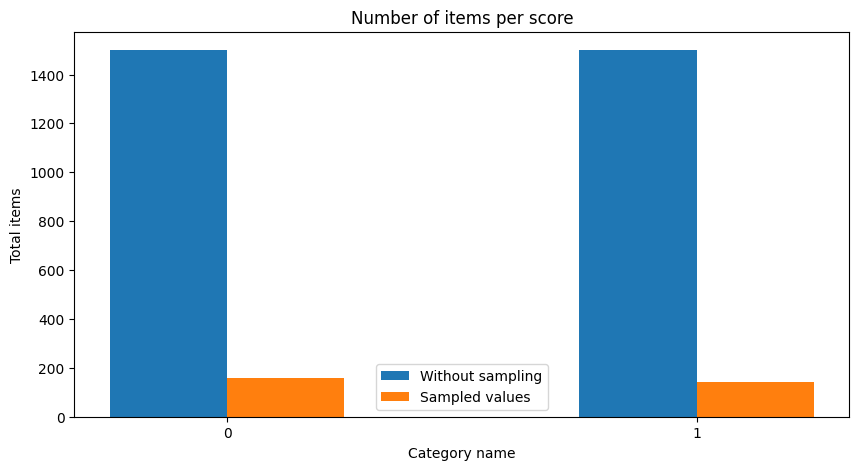

In [169]:
#There are 2 type of scores (0-negative and 1-positive) 1500 for each one in the general data set
#Items side by side per scores
# Number of bars per category
N = 2

# Position of the categories in x-axis
ind = np.arange(N)

# Graph size
plt.figure(figsize=(10,5))

# Width of the bar 
width = 0.25      

# Plotting the required graph
plt.bar(ind, X.Score.value_counts() , width, label='Without sampling')
plt.bar(ind + width, X_sample.Score.value_counts(), width, label='Sampled values')

#Labels
plt.xlabel('Category name')
plt.ylabel('Total items')
plt.title('Number of items per score')

#Bar titles
plt.xticks(ind + width / 2, (list(dict(X.Score.value_counts()))[0],list(dict(X.Score.value_counts()))[1]))

# The legends will be put on the best position
plt.legend(loc='best')
plt.show()

In [175]:
#Here we start the feature creation finding the frequencies for each term of the sentences
import nltk
X['unigrams'] = X['Sentences'].apply(lambda x: dmh.tokenize_text(x)) #Here the text gets tokenized
print(X[0:4]['unigrams']) #Sentences tokenized
X[0:4] #The new dataset

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


Sentences Score Category_name  \
0  So there is no way for me to plug it in here i...     0        amazon   
1                        Good case, Excellent value.     1        amazon   
2                             Great for the jawbone.     1        amazon   
3  Tied to charger for conversations lasting more...     0        amazon   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [176]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentences) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4165)	1
  (0, 4549)	1
  (0, 2428)	1
  (0, 3045)	1
  (0, 4991)	1
  (0, 1830)	1
  (0, 2811)	1
  (0, 4613)	1
  (0, 3389)	1
  (0, 2434)	1
  (0, 2315)	2
  (0, 2159)	1
  (0, 4535)	1
  (0, 4839)	1
  (0, 4797)	1
  (0, 1983)	1
  (0, 648)	1
  (0, 1014)	1


In [177]:
#Analizing the sentences
analyze = count_vect.build_analyzer()
analyze(X.Sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [178]:
X_counts.shape #We can see the shape of the tokenized sentences

(3000, 5159)

In [190]:
X_counts.toarray() #With this command we convert it from a sparse array to a normal one.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

(array([1298, 1620], dtype=int64), array([4535,  216], dtype=int64))
8


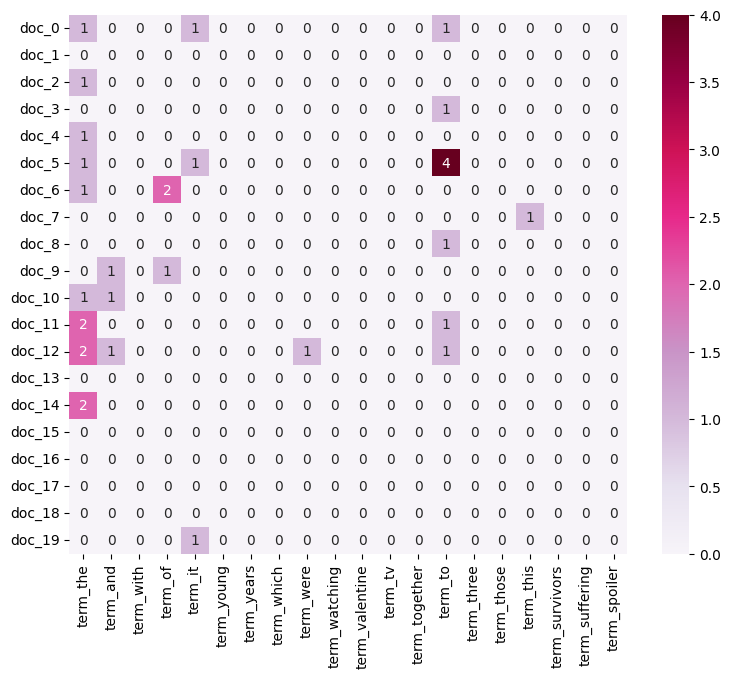

In [191]:
import seaborn as sns
result = np.where(X_counts.toarray() == np.amax(X_counts.toarray())) #Here it's searching for the max value among the ones in the array.
print(result)
print(X_counts.toarray()[1298,4535]) #It's found that said value is in row 1298


#To make the graph less sparse one thing we can do is sort out the maximum of incedences of a certain word in one document:
index_terms=[i[0] for i in sorted(enumerate(list(X_counts.toarray()[1298,:])), key=lambda x:x[1])[::-1]] #This line sorts from max to min the number of incedences in document 1298 and obtains the corresponding indexes for the term after sorting
terms=count_vect.get_feature_names_out()[index_terms[0:20]] #Now we can find the corresponding term according to the indexes found in the previous line, just for the test we will only obtain the first 20 terms.

plot_x = ["term_"+str(i) for i in terms] #Now we can represent the terms the terms that are most found in document 1298 and aligned it to the rest of the documents to compare
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]] #We will utilize only the first 20 documents just to see the result of our sorting
plot_z = X_counts[0:20, index_terms[0:20]].toarray() #We will only utilize the first 20 terms for the graph

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y) #plot the graph again
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=X_counts[0:20, index_terms[0:20]].toarray().max(), annot=True) #We will set the color according to the max value found in the first 20 items of the array, for the terms used in them

#It's not as sparse anymore with this kind of representation and we can get a better idea of what happens inside the array.

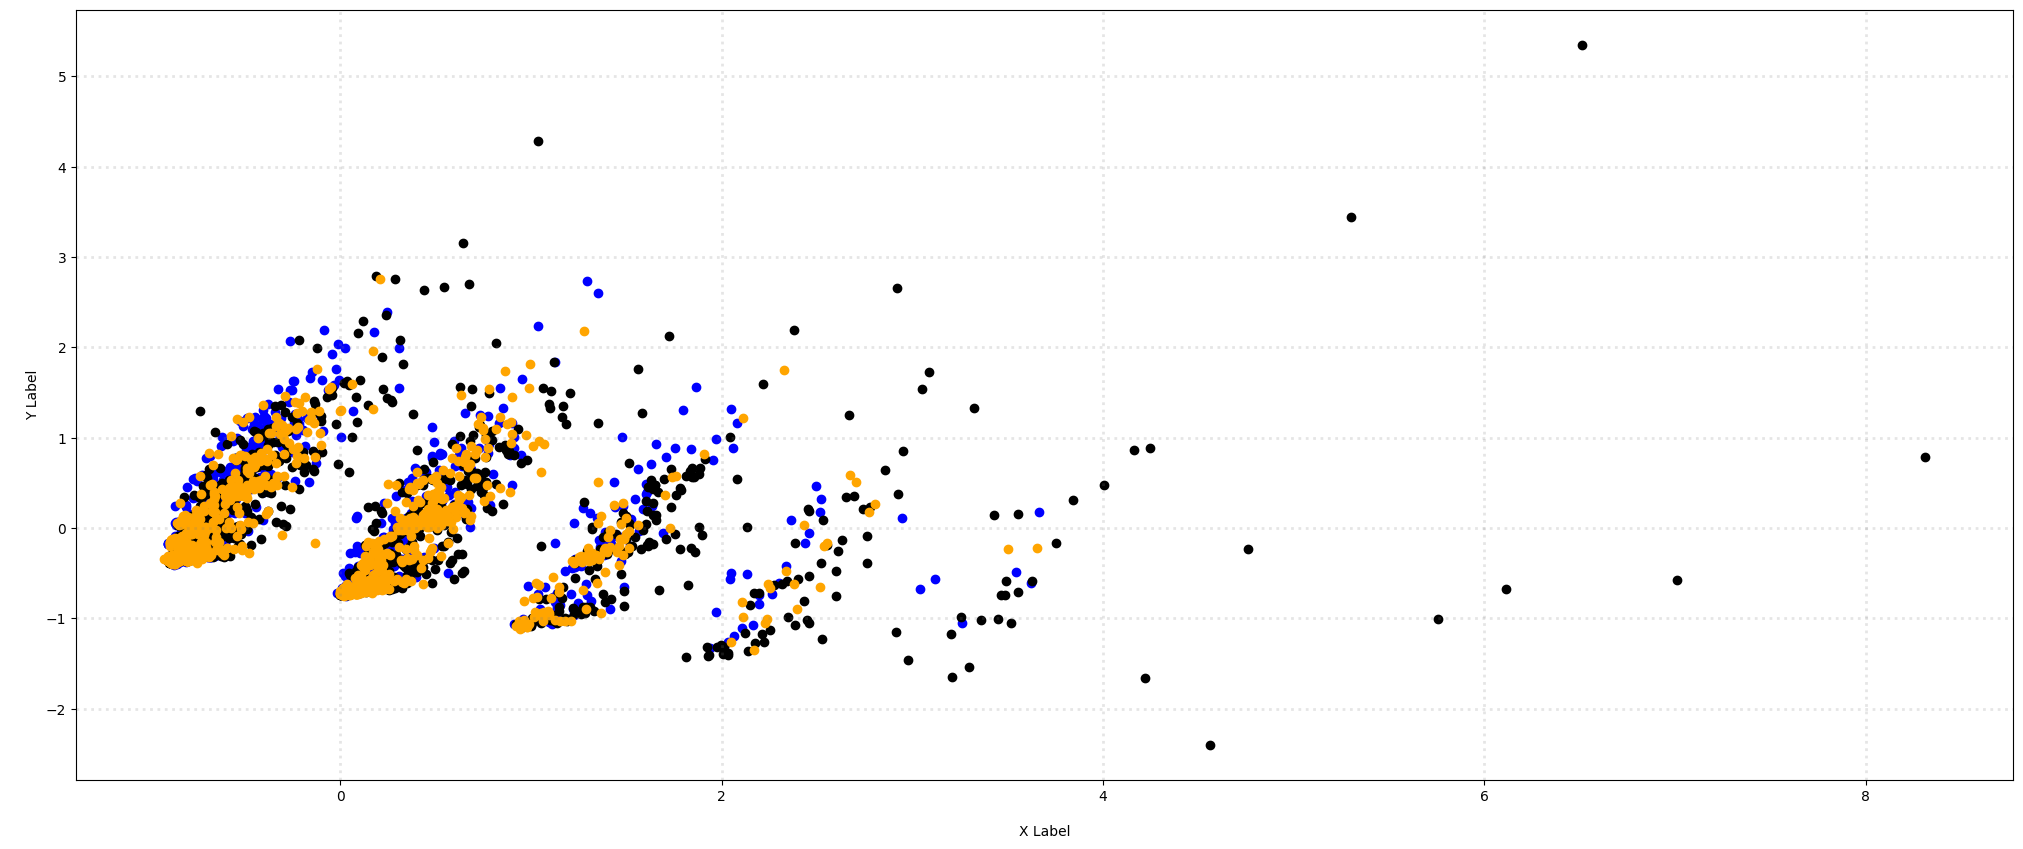

In [193]:
#DIMENSIONALITY REDUCTION:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray()) #We reduce the dimensions of the tokenized array to 2
categories=['amazon','imdb','yelp'] #The categories of the sites where the sentences where obtained
col = ['blue', 'black', 'orange'] #Colors for the representation in the graph

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories): #We plot a 2D scatter graph with the corresponding colors of the classes.
    xs = X_reduced[X['Category_name'] == category].T[0]
    ys = X_reduced[X['Category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()
#We can somehow see a pattern in the graph, like 4 little groups of points

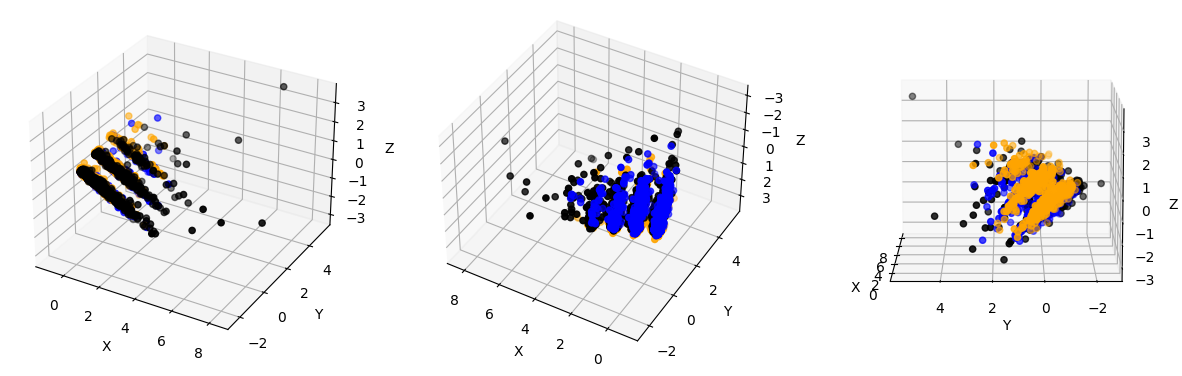

In [253]:
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray()) #We reduce the dimension to 3
col = ['blue', 'black', 'orange'] #The colors by category

fig = plt.figure(figsize=(15,15))
#We add 3 subplots 3D to view with different angle:
ax = fig.add_subplot(1,3,1,projection='3d') 
ax2 = fig.add_subplot(1,3,2,projection='3d') 
ax3 = fig.add_subplot(1,3,3,projection='3d') 

#We assign the color to each point in the graph by category so we can better distinguish the contrast after plotting
for c, category in zip(col, categories):
    xs = X_reduced_3[X['Category_name'] == category].T[0]
    ys = X_reduced_3[X['Category_name'] == category].T[1]
    zs = X_reduced_3[X['Category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o') #All 3 plots have the same data, we just change the angle to visualize it
    ax2.scatter(xs, ys, zs, c=c, marker='o')
    ax3.scatter(xs, ys, zs, c=c, marker='o')

#We assign the respective angles to visualize the 3D graph
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(-140, 60)

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(10, 180)

plt.show() #We plot the graph

#The cluster of data is better expressed in the 3D graph and the clusters of data are more clear to see.

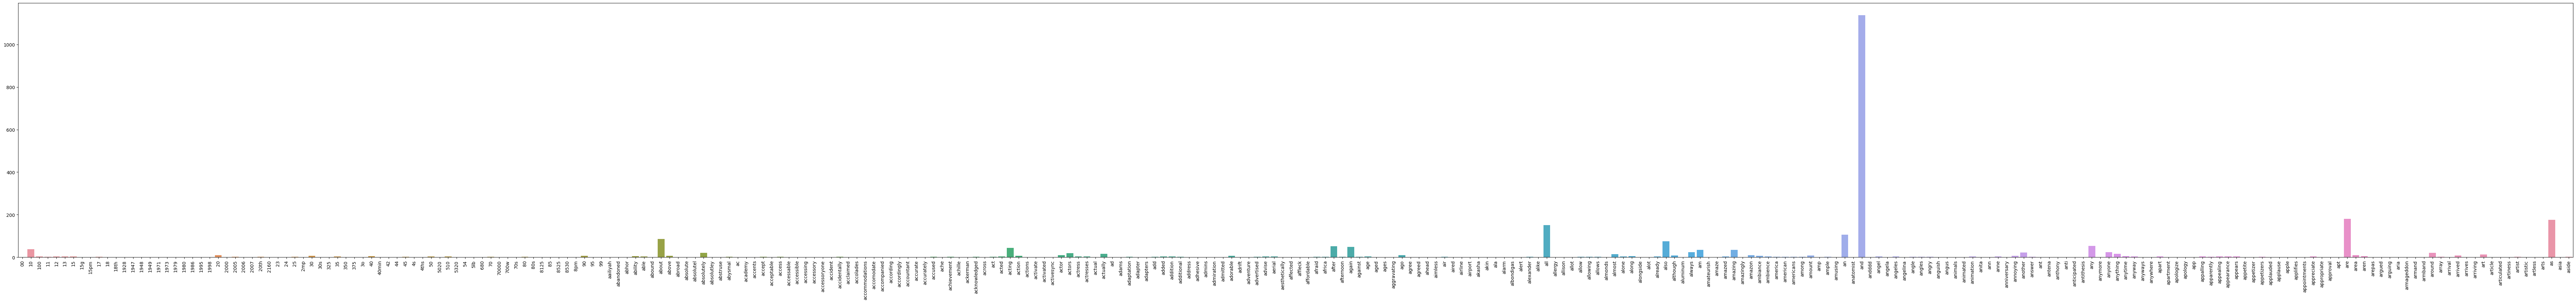

In [209]:
#ATTRIBUTE TRANSFORMATION / AGGREGATION
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] #Here we obtain the frequencies of the incidences by terms in the sentences

plt.subplots(figsize=(100, 10)) #We plot to see how many there are
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [210]:
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300]) #We plot with plotly for a much better experience
fig.show()

In [212]:
n=50 #Lower threshold to filter the frequencies
index_terms=[i for i,x in enumerate(term_frequencies) if x>n] #We filter according to the threshold, in this case that the frequency has to be over 50, we obtain the indexes that can satisfy this condition

terms=count_vect.get_feature_names_out()[index_terms] #We find the corresponding terms according to the indexes filtered above
filtered_frequencies=term_frequencies[index_terms] #We find the corresponding frequencies according to the indexes filtered above

fig = px.bar(x=terms, y=filtered_frequencies) #We plot with plotly again and we find a lesser number of terms
fig.show()

In [213]:
n=50 #Lower threshold to filter the frequencies
index_terms=[i for i,x in enumerate(term_frequencies) if x>n] #We filter according to the threshold, in this case that the frequency has to be over 50, we obtain the indexes that can satisfy this condition

terms=count_vect.get_feature_names_out()[index_terms] #We find the corresponding terms according to the indexes filtered above
filtered_frequencies=term_frequencies[index_terms] #We find the corresponding frequencies according to the indexes filtered above

index_terms_sorted=[i[0] for i in sorted(enumerate(list(filtered_frequencies)), key=lambda x:x[1])[::-1]] #We sort by the maximum frequency in the list first and obtain the new index
terms_sorted=terms[index_terms_sorted] #Now we can find the corresponding term according to the indexes found in the previous line, to obtain the one with the most use first and so on to see the 'long tail'
filtered_frequencies_sorted=filtered_frequencies[index_terms_sorted] #We index the frequencies too now that they are sorted

fig = px.bar(x=terms_sorted, y=filtered_frequencies_sorted) #We plot with plotly again so we can watch the 'long tail'
fig.show()

In [244]:
#Here we sort the frequencies and then apply the log function to see how it is it's behavior
import math
    
n=1 #Lower threshold to filter the frequencies
index_terms=[i for i,x in enumerate(term_frequencies) if x>n] #We filter according to the threshold, in this case that the frequency has to be over 1, we obtain the indexes that can satisfy this condition
terms=count_vect.get_feature_names_out()[index_terms] #We find the corresponding terms according to the indexes filtered above
filtered_frequencies=term_frequencies[index_terms] #We find the corresponding frequencies according to the indexes filtered above

index_terms_sorted=[i[0] for i in sorted(enumerate(list(filtered_frequencies)), key=lambda x:x[1])[::-1]] #We sort by the maximum frequency in the list first and obtain the new index
terms_sorted=terms[index_terms_sorted] #Now we can find the corresponding term according to the indexes found in the previous line, to obtain the one with the most use first and so on to see the 'long tail'

filtered_frequencies_sorted=filtered_frequencies[index_terms_sorted] #We index the frequencies too now that they are sorted

term_frequencies_log = [math.log(i) for i in filtered_frequencies_sorted] #We apply the log function to the sorted frequencies

fig = px.bar(x=terms_sorted, y=term_frequencies_log) #We plot with plotly again so we can watch the 'long tail'
fig.show()
#We can see a much better understandable graph, the thresshold was 1 and even to end of the tail doesn't seem that far behind to compare with other values.

In [247]:
#DISCRETIZATION AND BINARIZATION:

#We can hot encode the categories for this data set
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.Category_name)
X['bin_category'] = mlb.transform(X['Category_name']).tolist() #Here we binarize the Category names (sites) for each sentence
X[996:1005]

Sentences Score Category_name  \
996   What a piece of junk.. I lose more calls on th...     0        amazon   
997                        Item Does Not Match Picture.     0        amazon   
998   The only thing that disappoint me is the infra...     0        amazon   
999   You can not answer calls with the unit, never ...     0        amazon   
1000  A very, very, very slow-moving, aimless movie ...     0          imdb   
1001  Not sure who was more lost - the flat characte...     0          imdb   
1002  Attempting artiness with black & white and cle...     0          imdb   
1003       Very little music or anything to speak of.       0          imdb   
1004  The best scene in the movie was when Gerardo i...     1          imdb   

                                               unigrams bin_category  
996   [What, a, piece, of, junk, .., I, lose, more, ...    [1, 0, 0]  
997                [Item, Does, Not, Match, Picture, .]    [1, 0, 0]  
998   [The, only, thing, that, disappoint, me, is, t...    [1, 0, 0]  
999   [You, can, not, answer, calls, with, the, unit...    [1, 0, 0]  
1000  [A, very, ,, very, ,, very, slow-moving, ,, ai...    [0, 1, 0]  
1001  [Not, sure, who, was, more, lost, -, the, flat...    [0, 1, 0]  
1002  [Attempting, artiness, with, black, &, white, ...    [0, 1, 0]  
1003  [Very, little, music, or, anything, to, speak,...    [0, 1, 0]  
1004  [The, best, scene, in, the, movie, was, when, ...    [0, 1, 0]

In [257]:
#DATA EXPLORATION:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[1050]
random_record_2 = random_record_2['Sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[2005]
random_record_3 = random_record_3['Sentences']
document_to_transform_3.append(random_record_3)

In [258]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


In [259]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

#We can see that because the sentences are too short (not like the previous exercies in the Main file) 
#it is less probable to encounter the ones that share words with other.
#We can see that document 1 and 3 share some similarity.

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.105409
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [ ]:
#THIRD PART OF THE LAB:
########################

In [262]:
#TF-IDF FEATURES:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Z=vectorizer.fit_transform(X.Sentences)
vectorizer.get_feature_names_out()
Z.shape

(3000, 5159)

(array([ 185,  463,  485,  649,  751,  777,  877,  993, 1124, 1125, 1155,
       1162, 1725, 1788, 2165], dtype=int64), array([2331, 1297, 1299, 3379, 1298, 5109, 1604, 1297,  587,    1, 2224,
        353,  345,    1, 1202], dtype=int64))
1.0


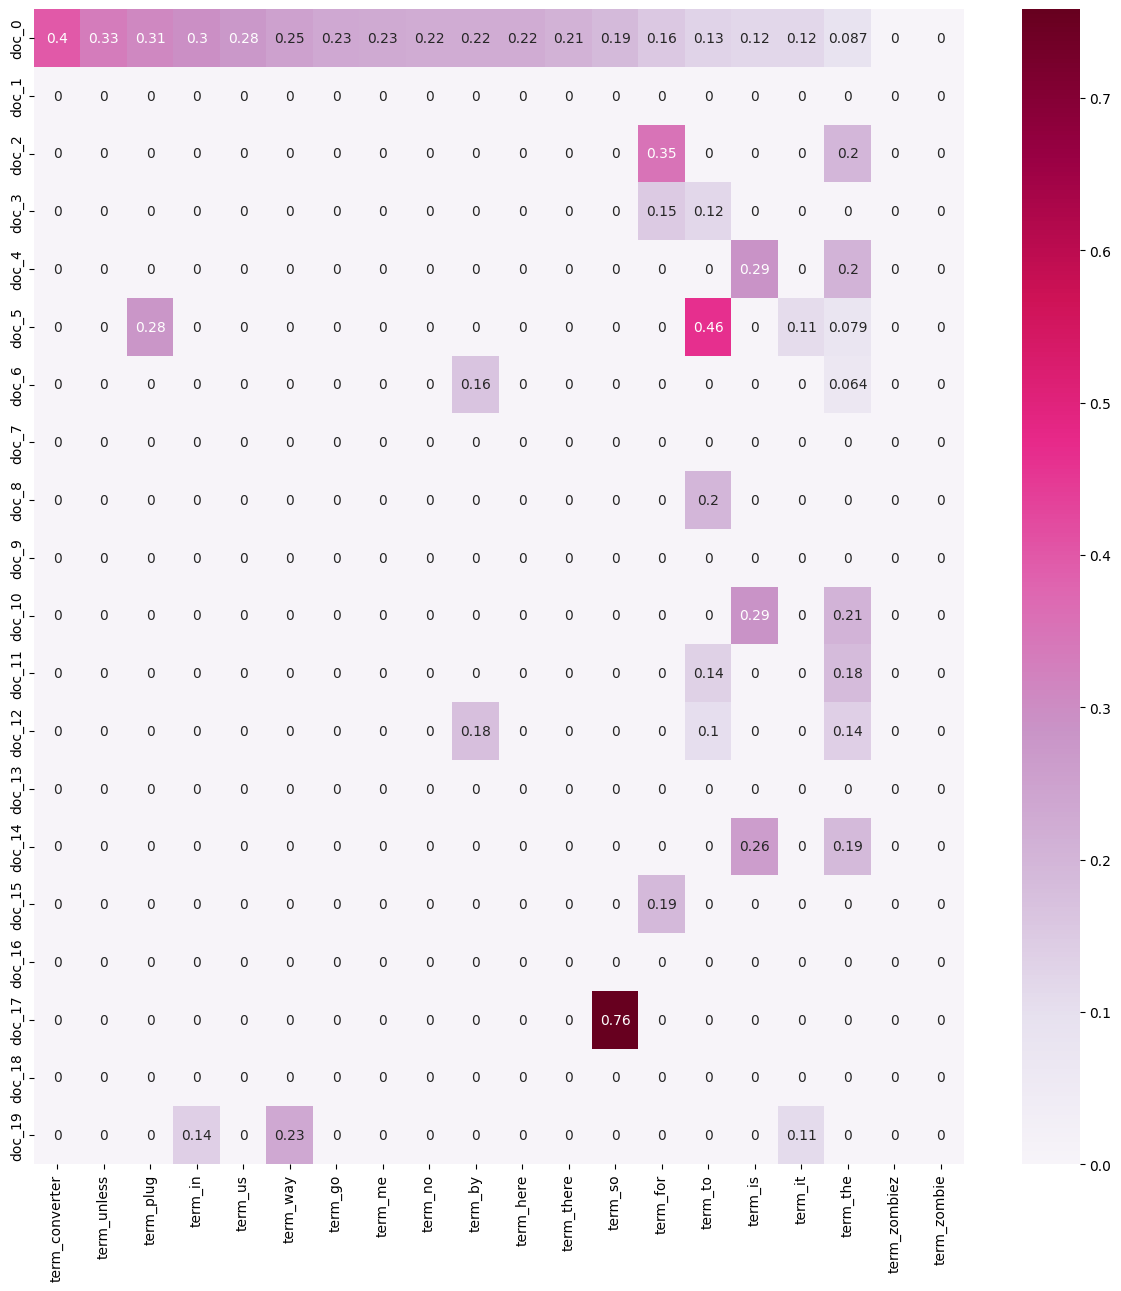

In [271]:
import seaborn as sns

#To make the graph less sparse one thing we can do is sort out the maximum of incedences of a certain word in one document:
index_terms=[i[0] for i in sorted(enumerate(list(Z.toarray()[0,:])), key=lambda x:x[1])[::-1]] #This line sorts from max to min the number of incedences in document 0 and obtains the corresponding indexes for the term after sorting
terms=count_vect.get_feature_names_out()[index_terms[0:20]] #Now we can find the corresponding term according to the indexes found in the previous line, just for the test we will only obtain the first 20 terms.

plot_x = ["term_"+str(i) for i in terms] #Now we can represent the terms the terms that are most found in document 0 and aligned it to the rest of the documents to compare
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]] #We will utilize only the first 20 documents just to see the result of our sorting
plot_z = Z[0:20, index_terms[0:20]].toarray() #We will only utilize the first 20 terms for the graph

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y) #plot the graph again
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=Z[0:20, index_terms[0:20]].toarray().max(), annot=True) #We will set the color according to the max value found in the first 20 items of the array, for the terms used in them

#We can appreciate that the values are not the total frequencies of the words, like with the other method using the CountVectorizer
#Here it uses the TF-IDF Value of each word per document

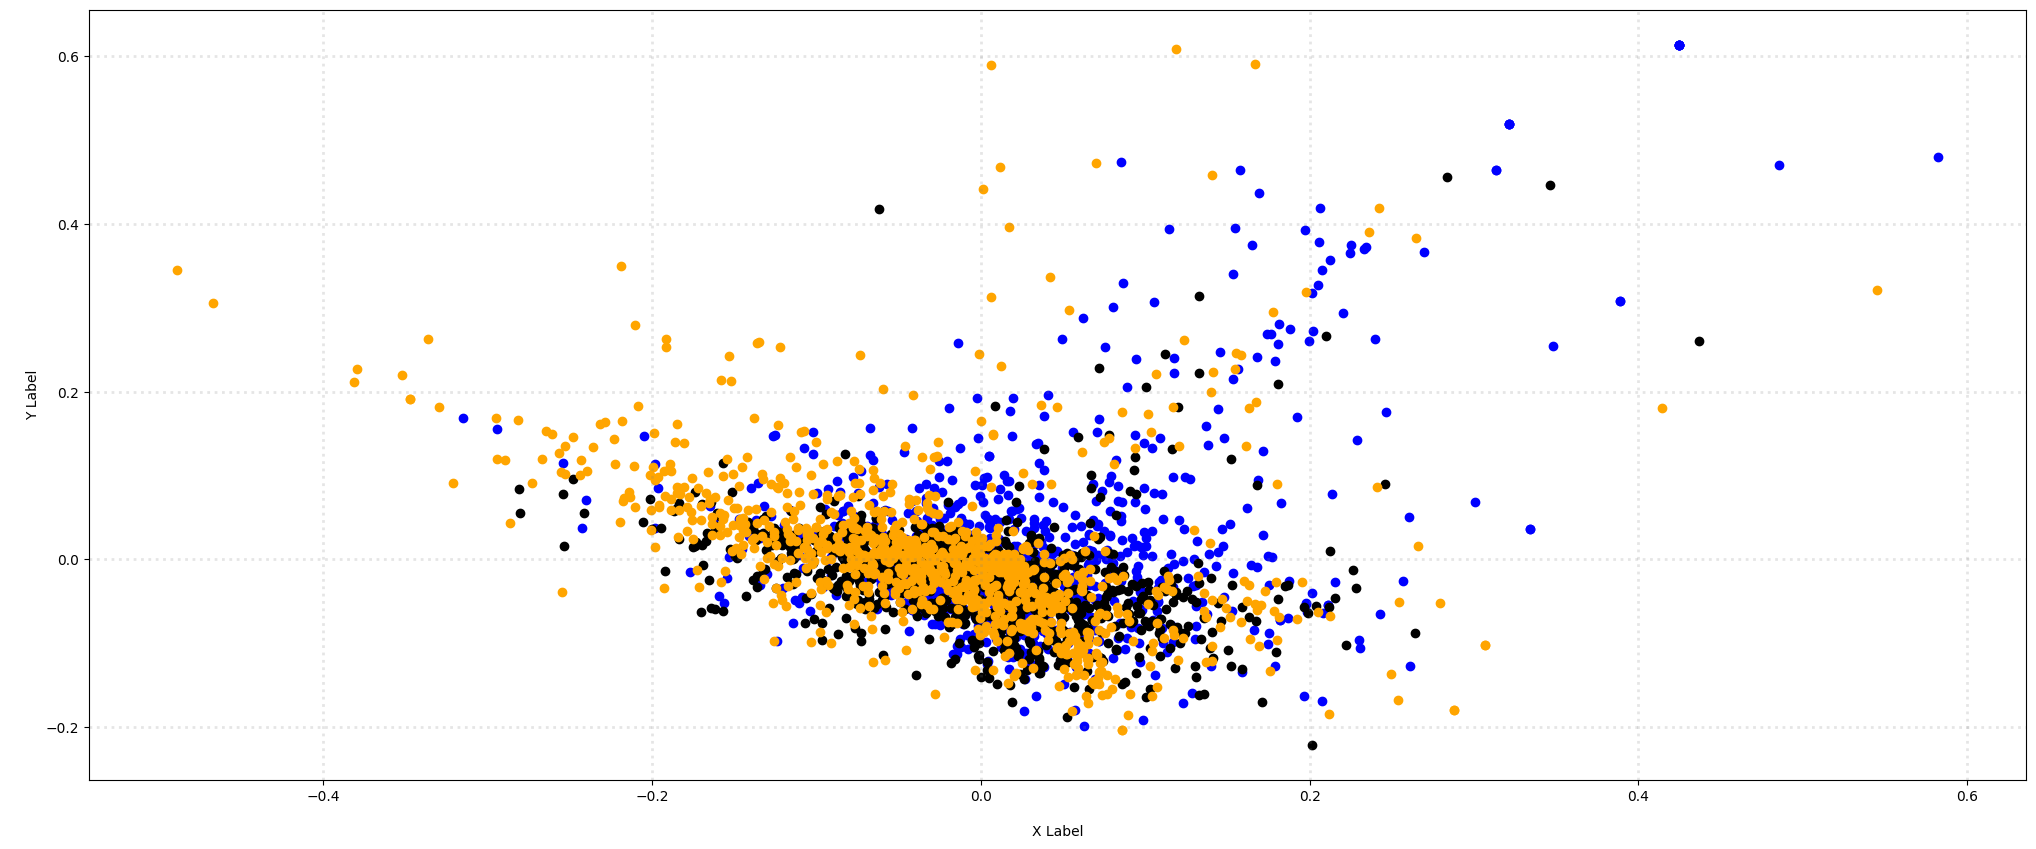

In [273]:
#DIMENSIONALITY REDUCTION:
from sklearn.decomposition import PCA
Z_reduced = PCA(n_components = 2).fit_transform(Z.toarray()) #We reduce the dimensions of the TF-IDF tokenized array to 2
categories=['amazon','imdb','yelp'] #The categories of the sites where the sentences where obtained
col = ['blue', 'black', 'orange'] #Colors for the representation in the graph

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories): #We plot a 2D scatter graph with the corresponding colors of the classes.
    xs = Z_reduced[X['Category_name'] == category].T[0]
    ys = Z_reduced[X['Category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()
#We can see other pattern in comparison to the previous method.

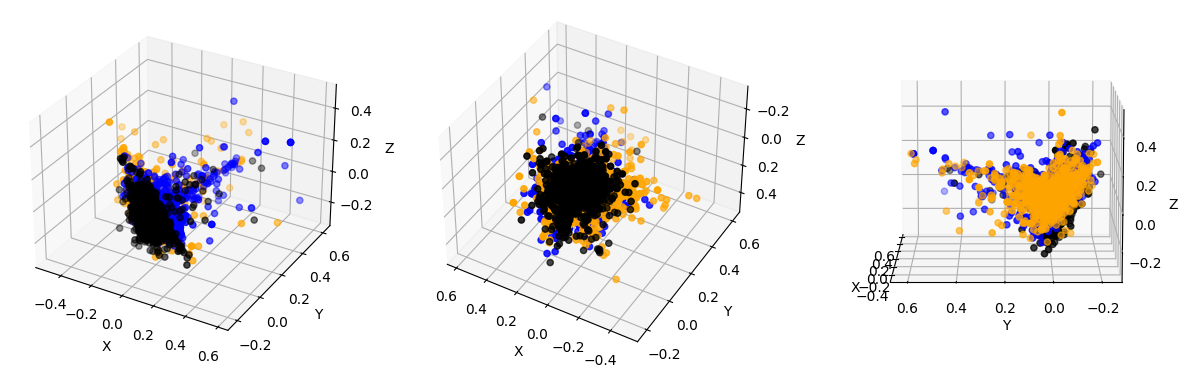

In [272]:
Z_reduced_3 = PCA(n_components = 3).fit_transform(Z.toarray()) #We reduce the dimension to 3
col = ['blue', 'black', 'orange'] #The colors by category

fig = plt.figure(figsize=(15,15))
#We add 3 subplots 3D to view with different angle:
ax = fig.add_subplot(1,3,1,projection='3d') 
ax2 = fig.add_subplot(1,3,2,projection='3d') 
ax3 = fig.add_subplot(1,3,3,projection='3d') 

#We assign the color to each point in the graph by category so we can better distinguish the contrast after plotting
for c, category in zip(col, categories):
    xs = Z_reduced_3[X['Category_name'] == category].T[0]
    ys = Z_reduced_3[X['Category_name'] == category].T[1]
    zs = Z_reduced_3[X['Category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o') #All 3 plots have the same data, we just change the angle to visualize it
    ax2.scatter(xs, ys, zs, c=c, marker='o')
    ax3.scatter(xs, ys, zs, c=c, marker='o')

#We assign the respective angles to visualize the 3D graph
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(-140, 60)

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(10, 180)

plt.show() #We plot the graph

#We can observe better how the data is clustered in a single place.

In [276]:
#ATTRIBUTE TRANSFORMATION / AGGREGATION
#Here we sort the frequencies and then apply the log function to see how it is it's behavior
import math

term_frequencies = []
for j in range(0,Z.shape[1]):
    term_frequencies.append(sum(Z[:,j].toarray()))
term_frequencies = np.asarray(Z.sum(axis=0))[0] #Here we obtain the frequencies of the incidences by terms in the sentences

n=1 #Lower threshold to filter the frequencies
index_terms=[i for i,x in enumerate(term_frequencies) if x>n] #We filter according to the threshold, in this case that the frequency has to be over 1, we obtain the indexes that can satisfy this condition
terms=count_vect.get_feature_names_out()[index_terms] #We find the corresponding terms according to the indexes filtered above
filtered_frequencies=term_frequencies[index_terms] #We find the corresponding frequencies according to the indexes filtered above

index_terms_sorted=[i[0] for i in sorted(enumerate(list(filtered_frequencies)), key=lambda x:x[1])[::-1]] #We sort by the maximum frequency in the list first and obtain the new index
terms_sorted=terms[index_terms_sorted] #Now we can find the corresponding term according to the indexes found in the previous line, to obtain the one with the most use first and so on to see the 'long tail'

filtered_frequencies_sorted=filtered_frequencies[index_terms_sorted] #We index the frequencies too now that they are sorted

term_frequencies_log = [math.log(i) for i in filtered_frequencies_sorted] #We apply the log function to the sorted frequencies

fig = px.bar(x=terms_sorted, y=term_frequencies_log) #We plot with plotly again so we can watch the 'long tail'
fig.show()


#The values in the logarithmic 'long tailed' graph also changed.